# Week 6 Tasks: NYT API Data and Cosine Similarity for Text 

These tasks were discussed during week 6 and you had to work on them with your group.  
Below are the solutions and additional tasks that will be helpful for your project.

**Table of Content**
* [Part 1: Working with the NYT API](#sec1)
* [Part 2: Cosine Similarity for Text](#sec2)
* [Part 3: Similarity of Spring and Summer sentences](#sec3)

<a id="sec1"></a>
## Part 1: Working with the NYT API 

We have the following goals:

1. Use the API to get all articles from a month
2. Verify the number of articles
3. Find the distribution of articles by section

### Important: replace the string below with your API key

In [2]:
myAPIkey = "NzVH8msxSDOGG54GuhjUj2O6o3bTYPAc"

We will write a function that given a date (month and year) will talk to the NYT API and get the articles for that time period. We will store the results in a JSON file to process when needed. 

In [3]:
import requests, json

def getNYTArticles(year, month, apiKey):
    """Function that sends a request to the NYT API for all articles in a month
    and then stores the results in a JSON file.
    """
    # create URL
    URL = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={apiKey}"

    # send the request to get the data
    data = requests.get(URL)
    if data.status_code == 200:
        print("Successfully got the data.")

    dataJson = data.json() # get response as JSON

    with open(f"NYT_{year}-{month}.json", 'w') as fout:
        json.dump(dataJson, fout)

Let's test the function for the months of February 2024:

In [4]:
getNYTArticles(2024, 2, myAPIkey)

Successfully got the data.


## Explore the NYT Data

Now that we have the data, we will look into how to retrieve things like article title, section, etc.

In [5]:
with open("NYT_2024-2.json") as fin:
    articles = json.load(fin)

print(type(articles))

<class 'dict'>


We can check the keys of this dictionary:

In [6]:
articles.keys()

dict_keys(['copyright', 'response'])

Then we check what values are stored under each key, without printing the values, but checking for their type:

In [7]:
for key in articles:
    print(key, type(articles[key]))

copyright <class 'str'>
response <class 'dict'>


In [8]:
articles['copyright']

'Copyright (c) 2024 The New York Times Company. All Rights Reserved.'

Let's look at the keys for 'response':

In [9]:
articles['response'].keys()

dict_keys(['docs', 'meta'])

One more time, we look what kind of information is stored under each of these keys:

In [10]:
for key in articles['response']:
    print(key, type(articles['response'][key]))

docs <class 'list'>
meta <class 'dict'>


In [11]:
# what is under the "meta" key?

articles['response']['meta']

{'hits': 3791}

So, this shows how many articles are in the data. We can verify this:

In [12]:
len(articles['response']['docs'])

3791

It's the same number, which is a good thing. Now let's look at what one of the articles (or docs) looks like:

In [13]:
articles['response']['docs'][0] # using indexing, because we know that the data is stored in a list

{'abstract': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'web_url': 'https://www.nytimes.com/2024/01/31/opinion/racist-backlash-history.html',
 'snippet': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'lead_paragraph': 'I am fascinated, and alarmed, by the swiftness with which periods of backlash take shape after surges of Black progress, and I believe that we have entered another such period.',
 'print_section': 'A',
 'print_page': '21',
 'source': 'The New York Times',
 'multimedia': [{'rank': 0,
   'subtype': 'xlarge',
   'caption': None,
   'credit': None,
   'type': 'image',
   'url': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
   'height': 800,
   'width': 600,
   'subType': 'xlarge',
   'crop_name': 'articleLarge',
   'legacy': {'xlarge': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
    'xlargewidth': 6

We can see tha an article is a somewhat nested data structure, it's a dictionary, but many of the keys point to list of other dictionaries. Let's look at the top fields: 

In [14]:
oneArticle = articles['response']['docs'][0]
for key in oneArticle:
    print(key, type(oneArticle[key]))

abstract <class 'str'>
web_url <class 'str'>
snippet <class 'str'>
lead_paragraph <class 'str'>
print_section <class 'str'>
print_page <class 'str'>
source <class 'str'>
multimedia <class 'list'>
headline <class 'dict'>
keywords <class 'list'>
pub_date <class 'str'>
document_type <class 'str'>
news_desk <class 'str'>
section_name <class 'str'>
byline <class 'dict'>
type_of_material <class 'str'>
_id <class 'str'>
word_count <class 'int'>
uri <class 'str'>


### Find the distribution of articles by section

As we saw above, every article has a section name, so we can easily collect all those names:

In [15]:
sections = [article['section_name'] for article in articles['response']['docs']]

# Let's look up a few of them
sections[:5]

['Opinion', 'New York', 'Opinion', 'World', 'U.S.']

In [16]:
from collections import Counter

distDct = Counter(sections) # count the occurrences of each section name

distDct.most_common(10)

[('U.S.', 734),
 ('World', 513),
 ('Arts', 326),
 ('Opinion', 272),
 ('Business Day', 244),
 ('New York', 200),
 ('Style', 174),
 ('Books', 139),
 ('Crosswords & Games', 125),
 ('Movies', 123)]

## Tasks for you:

1. Write a Python function that takes a date, for example, "2024-02-12", and returns the list of articles for that day.
2. Write some code that explores whether the fields "abstract" and "snippet" are always the same or they differ. Which one has more information?
3. Write a function that given one article (in its nested structure), creates a flat dictionary with keys that are relevant for analysis: either the abstract or snippet (see point 2); lead paragraph; headline; keywords concatenated via semicolon; pub_date; document_type; section_name; and type_of_material
4. Write another function that calls the function from point 3 on every article, to create a list of article dictionaries, and convert this list into a dataframe and then store it as a CSV file with the date-month in the title (this is important for point 5 below).
5. Once you have done all of these in the notebook, create a Python script that can be called with a date (from a TikTok video). First, the script looks whether a CSV with cleaned articles is in our folder. If not, calls first the API function to get the articles and then the function that converts them into a CSV. Then, it loads the CSV into a datafram and it uses filtering to get the articles for the desired date. These articles will be used for the Semantic Similarity portion of the TikTok Project.

In [59]:
#Task 1

def getArticleList(year, month, day, apiKey):
    """Function that sends a request to the NYT API for all articles in a month
    and then stores the results in a JSON file.
    """
    # create URL
    URL = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={apiKey}"

    # send the request to get the data
    data = requests.get(URL)
    if data.status_code == 200:
        print("Successfully got the data.")
        dataJson = data.json() # get response as JSON
    else:
        return {}
    
    if day < 10:
        day = '0' + str(day)
    if month < 10:
        month = '0' + str(month)
    
    allArticles = dataJson['response']['docs']
    dayArticles = [article for article in allArticles if article['pub_date'].split('T')[0]==f"{year}-{month}-{day}"]
    
    return dayArticles

In [35]:
articles = getArticleList(2024, 2, 1, myAPIkey)

Successfully got the data.


In [42]:
#Task 2 - exploring Snippet vs. Abstract. They appear to be the same.

equalCount = 0
for article in articles:
    if len(article['snippet']) == len(article['abstract']):
        equalCount += 1
    else:
        print(max(len(article['snippet']), len(article['abstract'])))
print(equalCount/len(articles)) #print the percentage of articles with equal length Snippet and Abstract sections

1.0


In [46]:
#Task 3

def cleanArticle(article):
    keywords = ''
    for keyword in article['keywords']:
        keywords += keyword['value']+';'
    articleDict = {'abstract': article['abstract'], 'lead_paragraph': article['lead_paragraph'],
                  'headline': article['headline']['main'], 'keywords': keywords,
                  'pub_date': article['pub_date'], 'document_type': article['document_type'],
                  'section_name': article['section_name'], 'type_of_material': article['type_of_material']}
    return articleDict

In [47]:
sample_article = cleanArticle(articles[0])
print(sample_article)

{'abstract': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.', 'lead_paragraph': 'I am fascinated, and alarmed, by the swiftness with which periods of backlash take shape after surges of Black progress, and I believe that we have entered another such period.', 'headline': 'The Dawn of a New Era of Oppression', 'keywords': 'Hate Crimes;Black People;Blacks;Discrimination;Civil Rights Movement (1954-68);Reconstruction Era;Segregation and Desegregation;Nixon, Richard Milhous;', 'pub_date': '2024-02-01T00:00:08+0000', 'document_type': 'article', 'section_name': 'Opinion', 'type_of_material': 'Op-Ed'}


In [50]:
#Task 4

import pandas as pd

def cleanAllArticles(articleList, year, month, day):
    cleaned = [cleanArticle(article) for article in articleList]
    articleDF = pd.DataFrame(cleaned)
    
    if day < 10:
        day = '0' + str(day)
    if month < 10:
        month = '0' + str(month)
    
    articleDF.to_csv(f'NYTarticles_{year}-{month}-{day}.csv')    

In [51]:
cleanAllArticles(articles, 2024, 2, 1)

In [65]:
#Task 5
import os

def getArticlesForDate(year, month, day):
    m = month
    d = day
    if d < 10:
        d = '0' + str(d)
    if m < 10:
        m = '0' + str(m)
    if os.path.exists(f'NYTarticles_{year}-{m}-{d}') == False:
        articles = getArticleList(year, month, day, myAPIkey)
        cleanAllArticles(articles, year, month, day)
    articleDF = pd.read_csv(f'NYTarticles_{year}-{m}-{d}.csv')
    return articleDF


In [66]:
getArticlesForDate(2024, 2, 1)

Successfully got the data.


,Unnamed: 0,abstract,lead_paragraph,headline,keywords,pub_date,document_type,section_name,type_of_material
0,0,Periods of backlash take shape after surges of...,"I am fascinated, and alarmed, by the swiftness...",The Dawn of a New Era of Oppression,Hate Crimes;Black People;Blacks;Discrimination...,2024-02-01T00:00:08+0000,article,Opinion,Op-Ed
1,1,The sentencing judge called Ralph Joseph Celen...,A Queens man who tackled a police officer and ...,Man Who Pushed Officer Over Ledge on Jan. 6 Is...,"Storming of the US Capitol (Jan, 2021);Celenta...",2024-02-01T00:02:20+0000,article,New York,News
2,2,Don’t be an election spoiler.,"Think I have something good to report, people....",Running for President Is Not a Hobby,Presidential Election of 2024;Third-Party Poli...,2024-02-01T00:03:34+0000,article,Opinion,Op-Ed
3,3,"The judge, after expressing regret that he was...",A federal judge on Wednesday dismissed a lawsu...,A federal judge dismisses a suit to block U.S....,"Gaza Strip;Israel;Austin, Lloyd J III;Biden, J...",2024-02-01T00:53:17+0000,article,World,News
4,4,"The total, which does not indicate how much sh...","Nikki Haley, the last candidate standing betwe...","Haley Entered 2024 With $14.6 Million, Fueling...","Haley, Nikki R;Campaign Finance;Presidential E...",2024-02-01T02:53:26+0000,article,U.S.,News
...,...,...,...,...,...,...,...,...,...
169,169,The Senate majority leader promised a test vot...,"Senator Chuck Schumer, Democrat of New York an...",Schumer Plans Vote Next Week on Border and Ukr...,United States Politics and Government;Law and ...,2024-02-01T22:54:25+0000,article,U.S.,News
170,170,"Also, the world’s largest record label pulled ...","At an emergency summit today in Brussels, Euro...","The E.U. Agreed to Aid Ukraine, Shifting Focus...",NaN,2024-02-01T23:06:32+0000,article,Briefing,News
171,171,The White House announced financial penalties ...,President Biden imposed financial sanctions on...,What to Know About the 4 Israelis Placed Under...,Israel-Gaza War (2023- );West Bank;Embargoes a...,2024-02-01T23:27:46+0000,article,World,News
172,172,Impeachment was once seen as perhaps the most ...,If the House follows through on this week’s co...,Inside Impeachment’s Rise as a Weapon of Parti...,Impeachment;Republican Party;House of Represen...,2024-02-01T23:34:55+0000,article,U.S.,News Analysis


<a id="sec2"></a>
## Part 2: Cosine Similarity for Text

We will start with the example that was in the slides. There, we initially used the Jaccard similarity to rank sentences most similar to a query, and when that didn't work as expected, we looked at the cosine similarity.

### Use Jaccard similarity for a query phrase and a list of sentences

In [67]:
q = "red dress"

sentences = [
"she wore a dress and red earrings",
"the dress has a red wine stain",
"tomorrow I will wear my new red dress",
"the red dress in the photo resembles the red dress she is wearing",
"short dress",
"red lipstick"
]

def jaccard(text1, text2):
    """Implement Jaccard similarity. Assumes there is no punctuation in text."""
    sw1 = set(text1.lower().split()) # turn into a set of words
    sw2 = set(text2.lower().split())
    sim = len(sw1.intersection(sw2)) / len(sw1.union(sw2))
    return round(sim, 4) # round to 4 digits after the comma

def applyJaccard(query, sentences):
    """Appl the Jaccard similarity between query and each sentence"""
    results = []
    for sent in sentences:
        jac = jaccard(query, sent)
        results.append((jac, sent))
    
        # Sort in descending order
        results.sort(reverse=True)

    return results

# call the function

applyJaccard(q, sentences)

[(0.3333, 'short dress'),
 (0.3333, 'red lipstick'),
 (0.2857, 'the dress has a red wine stain'),
 (0.2857, 'she wore a dress and red earrings'),
 (0.25, 'tomorrow I will wear my new red dress'),
 (0.2222, 'the red dress in the photo resembles the red dress she is wearing')]

As we discussed in class, the Jaccard similarity is not doing well with our data (showing as similar text that, thus, we will try the cosine similarity. However, in order to apply the cosine similarity, we need some other steps:

1. Create the vocabulary of words that will serve as the dimensions of our vector space
2. Represent each document as a vector in the vector space

### Create Vocabulary

While our sentences in the example don't have punctuation, most of the time text will have it, thus, we need to be prepared to remove it. This will be necesary in order to avoid a word show multiple times, with and without punctuation.

In [68]:
phrase = "that, that is the thing I want: dancing by the river! ah, the river, I have missed it so much!"
phrase.lower().split()

['that,',
 'that',
 'is',
 'the',
 'thing',
 'i',
 'want:',
 'dancing',
 'by',
 'the',
 'river!',
 'ah,',
 'the',
 'river,',
 'i',
 'have',
 'missed',
 'it',
 'so',
 'much!']

Notice how we have both "that!" and "that", and also "river," and "river!". This is why we will remove punctuation. Luckily, Python has a library that lists all punctuation:

In [69]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

One way to go about it is the following:

In [70]:
"".join(char for char in phrase if char not in string.punctuation)

'that that is the thing I want dancing by the river ah the river I have missed it so much'

Notice how all the punctuation is gone. Now that we know how to do this, we can write our function.

In [71]:
def getVocabulary(textchunk):
    """Given some text, create the vocabulary of unique words."""
    textchunk = textchunk.lower()
    cleantext = "".join(char for char in textchunk if char not in string.punctuation)
    words = set(cleantext.split())
    voc = sorted(words)

    return voc

Let's test it with our sentences. Since they are a list, we turn them into a string first:

In [72]:
getVocabulary(" ".join(sentences))

['a',
 'and',
 'dress',
 'earrings',
 'has',
 'i',
 'in',
 'is',
 'lipstick',
 'my',
 'new',
 'photo',
 'red',
 'resembles',
 'she',
 'short',
 'stain',
 'the',
 'tomorrow',
 'wear',
 'wearing',
 'will',
 'wine',
 'wore']

It looks good, no word is repeated. 

### Vector representation

Now that we have a vocabulary, we can easily convert every sentence into a vector of numbers. Remember, all the vectors will have the same length. They will have 0 for a dimension (word) that they don't have, and the count of word for a dimension they have.

In [74]:
def text2vector(sentence, voc):
    """Given a sentence and the vocabulary for the problem,
    turn every sentence into a vector.
    """
    cleantext = "".join(char for char in sentence if char not in string.punctuation)
    words = cleantext.lower().split()
    vector = [words.count(w) for w in voc]
    return vector

Let's try it with one sentence:

In [75]:
voc = getVocabulary(" ".join(sentences))
text2vector(sentences[0], voc)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Let's verify that this is done right by checking what sentence was turned into a vector:

In [76]:
sentences[0]

'she wore a dress and red earrings'

Let's combine the vocabulary and the vector to see the pairs:

In [77]:
list(zip(voc, text2vector(sentences[0], voc)))

[('a', 1),
 ('and', 1),
 ('dress', 1),
 ('earrings', 1),
 ('has', 0),
 ('i', 0),
 ('in', 0),
 ('is', 0),
 ('lipstick', 0),
 ('my', 0),
 ('new', 0),
 ('photo', 0),
 ('red', 1),
 ('resembles', 0),
 ('she', 1),
 ('short', 0),
 ('stain', 0),
 ('the', 0),
 ('tomorrow', 0),
 ('wear', 0),
 ('wearing', 0),
 ('will', 0),
 ('wine', 0),
 ('wore', 1)]

Notice how each word in our sentence has a 1 next to it and all the other words have a 0.

We will now convert all the sentences to vectors:

In [78]:
sent2vec = [text2vector(sent, voc) for sent in sentences]
sent2vec

[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
 [0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

We represent this in pandas:

In [79]:
import pandas as pd
df = pd.DataFrame(sent2vec, 
                  columns=voc,
                  index=[f"doc_{i+1}" for i in range(len(sentences))])
df

,a,and,dress,earrings,has,i,in,is,lipstick,my,...,she,short,stain,the,tomorrow,wear,wearing,will,wine,wore
doc_1,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
doc_2,1,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
doc_3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
doc_4,0,0,2,0,0,0,1,1,0,0,...,1,0,0,3,0,0,1,0,0,0
doc_5,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Cosine Similarity

We discussed the implementation of cosine similarity in class. Below is the function that implements it.

In [80]:
import numpy as np
from numpy.linalg import norm
 
def cosineSimilarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine

Now that we have the cosine similarity function, we will write a function that given a query and a list of sentences, calculates the similarity score for each pair (query, sentence).

In [81]:
def rankDocuments(query, sentences):
    """Given a query and some sentences, rank the sentences for 
    which are the most similar to the query.
    """
    # Step 1: create vocabulary
    voc = getVocabulary(" ".join(sentences))

    # Step 2: generate vector for query
    queryVec = text2vector(query, voc)

    # Step 3: generate vector for sentences and calculate cosine similarity at once
    similarities = []
    for sent in sentences:
        sentVec = text2vector(sent, voc)
        sim = cosineSimilarity(queryVec, sentVec)
        similarities.append((round(sim, 4), sent)) # keep track of sentences

    similarities.sort(reverse=True) # most similar sentence at the top
    return similarities

Now we can call the function for our query "red dress" and the list of sentences:

In [82]:
rankDocuments("red dress", sentences)

[(0.5898, 'the red dress in the photo resembles the red dress she is wearing'),
 (0.5345, 'the dress has a red wine stain'),
 (0.5345, 'she wore a dress and red earrings'),
 (0.5, 'tomorrow I will wear my new red dress'),
 (0.5, 'short dress'),
 (0.5, 'red lipstick')]

**Note:** These values are slightly different from the ones in the slides. There was a bug with the word "I", which was not lowercased in the sentences, so it didn't count in the vector. The bug has been fixed in this version.

<a id="sec3"></a>
## Part 3: Similarity of Spring and Summer sentences

You were given the following sentences in the slides of Day 10. These were created by GenAI to capture the spirit of "spring" and "summer".

In [83]:
springSentences = [
"As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
"Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
"With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
"The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
"During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun."
]

summerSentences = [
"Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
"The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
"As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
"The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
"Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."
]

**Our Goal:**

We want to generate a heatmap of the similarity scores between all sentences to one another to find out how similar they are. To achieve this goal, we need to break down the task:

1. We need to create first the vocabulary of all terms (or the dimensions of our vector space).
2. We will turn every sentence into a vector.
3. We will compare every sentence to every other sentence through the cosine similartiy to create the similarity matrix.
4. We will draw the heatmap with seaborn.

### Create Vocabulary

We will call the function `getVocabulary` that we created before.

In [84]:
allSentences = " ".join(springSentences) + " " + " ".join(summerSentences)
voc = getVocabulary(allSentences)
print(f"Vocabulary has {len(voc)} words.")

Vocabulary has 102 words.


### Convert sentences to vectors

We will call the function `text2vector` on every sentence:

In [85]:
sentVectors = [text2vector(sent, voc) for sent in springSentences+summerSentences]
print(len(sentVectors), len(sentVectors[0]))

10 102


This means that we created 10 vectors, each with a length of 102 dimensions.  
Let's check our work:

In [86]:
oneSent = springSentences[0]
oneSent

'As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.'

In [87]:
pairs = list(zip(text2vector(oneSent, voc), voc))
nonZero = [pair for pair in pairs if pair[0] != 0]
nonZero

[(1, 'ahead'),
 (1, 'as'),
 (1, 'blossoms'),
 (1, 'days'),
 (1, 'encourages'),
 (1, 'first'),
 (1, 'longer'),
 (1, 'of'),
 (1, 'open'),
 (1, 'season'),
 (1, 'signaling'),
 (1, 'spring'),
 (3, 'the'),
 (1, 'to'),
 (1, 'unfolds'),
 (1, 'warmth')]

In [88]:
print(f"Words in sentence: {len(oneSent.split())}; nonzero terms in vector: {len(nonZero)}")

Words in sentence: 18; nonzero terms in vector: 16


This looks good. There are 16 unique words, and the word "the" is repeated two more times, that explains the numbers 16 and 18. 

### Calculating the similarity matrix

We will calculate the cosine similarity for every pair of sentences. This makes sense because we only have 10 sentences, if we had way more, we will try to be more efficient and not repeat the calculations (since we know that the matrix is symmetrical). 

In [89]:
simMatrix = []
for vec1 in sentVectors:
    simRow = []
    for vec2 in sentVectors:
        simRow.append(cosineSimilarity(vec1, vec2))
    simMatrix.append(simRow)

print(simMatrix)

[[1.0000000000000002, 0.3061862178478973, 0.468292905790847, 0.6064784348631228, 0.3481553119113957, 0.2857738033247041, 0.3651483716701107, 0.40089186286863665, 0.3118047822311618, 0.38575837490522974], [0.3061862178478973, 1.0, 0.22941573387056174, 0.2785430072655778, 0.26650089544451305, 0.3, 0.2795084971874737, 0.3273268353539886, 0.2727723627949905, 0.1889822365046136], [0.468292905790847, 0.22941573387056174, 0.9999999999999998, 0.5538186196949965, 0.3423811916311629, 0.3670651741928988, 0.3590924232298039, 0.40050093945740706, 0.3003757045930553, 0.3468439878096479], [0.6064784348631228, 0.2785430072655778, 0.5538186196949965, 1.0000000000000002, 0.43549417035569277, 0.297112541083283, 0.41522739926869984, 0.4862645390838647, 0.44574249416020933, 0.386024323488978], [0.3481553119113957, 0.26650089544451305, 0.3423811916311629, 0.43549417035569277, 1.0, 0.34112114616897665, 0.38138503569823684, 0.37219368415938836, 0.37219368415938836, 0.3223291856101521], [0.2857738033247041, 0.

### Generate the heatmap

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

def drawHeatmap(sentLabels, simMtrx, plotTitle):
    """Draws a heatmap for the similarity matrix.
    """
    sns.set(font_scale=0.9)
    g = sns.heatmap(
          simMtrx, # similarity matrix with the cosine sim values
          xticklabels=sentLabels,
          yticklabels=sentLabels,
          vmin=0,
          vmax=1,
          cmap="YlOrRd")
    g.set_xticklabels(sentLabels, rotation=90)
    g.set_title(plotTitle, fontsize=14)
    plt.show()

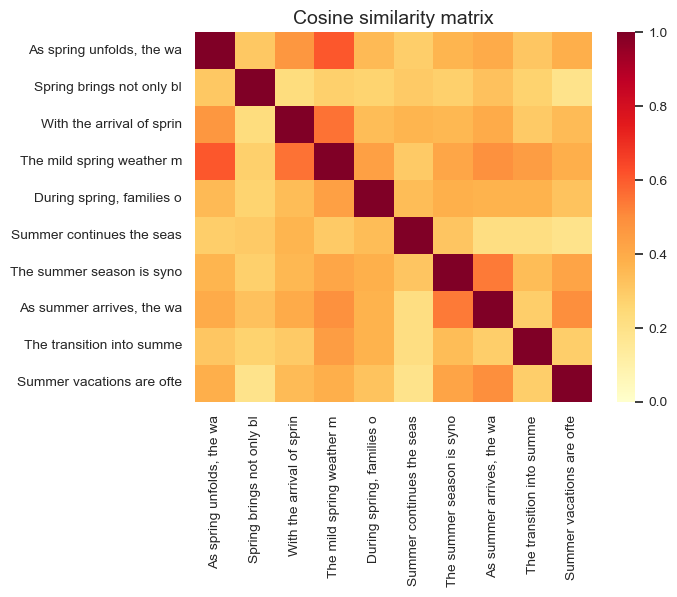

In [91]:
shortSent = [sent[:25] for sent in springSentences+summerSentences]
drawHeatmap(shortSent, simMatrix, "Cosine similarity matrix")

### Short Exploration

Let's look at the similarity matrix in a pandas dataframe:

In [92]:
labels = [f"s{i+1}" for i in range(10)]
df = pd.DataFrame(simMatrix, columns=labels, index=labels)
df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
s1,1.000000,0.306186,0.468293,0.606478,0.348155,0.285774,0.365148,0.400892,0.311805,0.385758
s2,0.306186,1.000000,0.229416,0.278543,0.266501,0.300000,0.279508,0.327327,0.272772,0.188982
s3,0.468293,0.229416,1.000000,0.553819,0.342381,0.367065,0.359092,0.400501,0.300376,0.346844
s4,0.606478,0.278543,0.553819,1.000000,0.435494,0.297113,0.415227,0.486265,0.445742,0.386024
s5,0.348155,0.266501,0.342381,0.435494,1.000000,0.341121,0.381385,0.372194,0.372194,0.322329
s6,0.285774,0.300000,0.367065,0.297113,0.341121,1.000000,0.313050,0.218218,0.218218,0.188982
s7,0.365148,0.279508,0.359092,0.415227,0.381385,0.313050,1.000000,0.536745,0.341565,0.422577
s8,0.400892,0.327327,0.400501,0.486265,0.372194,0.218218,0.536745,1.000000,0.285714,0.494872
s9,0.311805,0.272772,0.300376,0.445742,0.372194,0.218218,0.341565,0.285714,1.000000,0.288675
s10,0.385758,0.188982,0.346844,0.386024,0.322329,0.188982,0.422577,0.494872,0.288675,1.000000


I will write some code to compare sentences that have a high similarity score:

In [93]:
def getWords(sent):
    """Get the words of a sentence after lowercasing and removing punctuation."""
    cleantext = "".join(char for char in sent.lower() if char not in string.punctuation)
    cleanWords = cleantext.split()
    return cleanWords

In [94]:
def compareSentences(sent1, sent2):
    """Compare the content of two sentences."""
    words1 = getWords(sent1)
    words2 = getWords(sent2)
    commonWords = sorted([w for w in words1 if w in words2])
    print("COMPARISON RESULTS")
    print("Sent1: ", sent1)
    print("Sent2: ", sent2)
    print(f"Lengths of sentences: {len(words1)} and {len(words2)}. Words in common: {len(commonWords)}")
    print("Common words:", commonWords)

Let's check s1 and s4, in the group os Spring sentences:

In [95]:
compareSentences(springSentences[0], springSentences[3])

COMPARISON RESULTS
Sent1:  As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.
Sent2:  The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.
Lengths of sentences: 18 and 17. Words in common: 7
Common words: ['of', 'spring', 'the', 'the', 'the', 'to', 'warmth']


What about the sentences s7 and s8, in the group of Summer sentences?

In [96]:
compareSentences(summerSentences[1], summerSentences[2])

COMPARISON RESULTS
Sent1:  The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.
Sent2:  As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.
Lengths of sentences: 18 and 19. Words in common: 9
Common words: ['began', 'enjoying', 'in', 'outdoor', 'spring', 'summer', 'that', 'the', 'the']
